# Image Alignment

### In this tutorial, I will show an example of aligning two data sets, each with different pixel size and field of view dimensions.

In [1]:
## importing libraries
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from numpy import flipud

### For this example, I have a brightness image taken by an instrument called SuFI, which is a filtergraph on-board the balloon observatory, SUNRISE. The other continuum image is from another scientific instrument called IMaX, which is a spectropolarimter. SuFI FOV is smaller and a sub of the IMaX FOV as you can see below.

In [2]:
path = '/home/fatima/Desktop/project_2/alignment/'
sufi_image = np.flipud(pyfits.getdata(path+'sufi_007.fits'))
imax_image = np.flipud(pyfits.getdata(path+'imax_007.fits')) ## we are flipping the images for a better view

/usr/local/lib/python2.7/dist-packages/pyfits/card.py:704: UserWarning: The following header keyword is invalid or follows an unrecognized non-standard convention:
REDPDVER =                   '1.1' / Phase Diversity reduction version          
  self._image)
/usr/local/lib/python2.7/dist-packages/pyfits/card.py:704: UserWarning: The following header keyword is invalid or follows an unrecognized non-standard convention:
L_BURST  =                       1 / Number of images of burst                  
  self._image)
/usr/local/lib/python2.7/dist-packages/pyfits/card.py:704: UserWarning: The following header keyword is invalid or follows an unrecognized non-standard convention:
BURST    = [926] / Image Numbers of burst                                       
  self._image)
/usr/local/lib/python2.7/dist-packages/pyfits/card.py:704: UserWarning: The following header keyword is invalid or follows an unrecognized non-standard convention:
AVZER    =                       1 /  use averaged Zerni

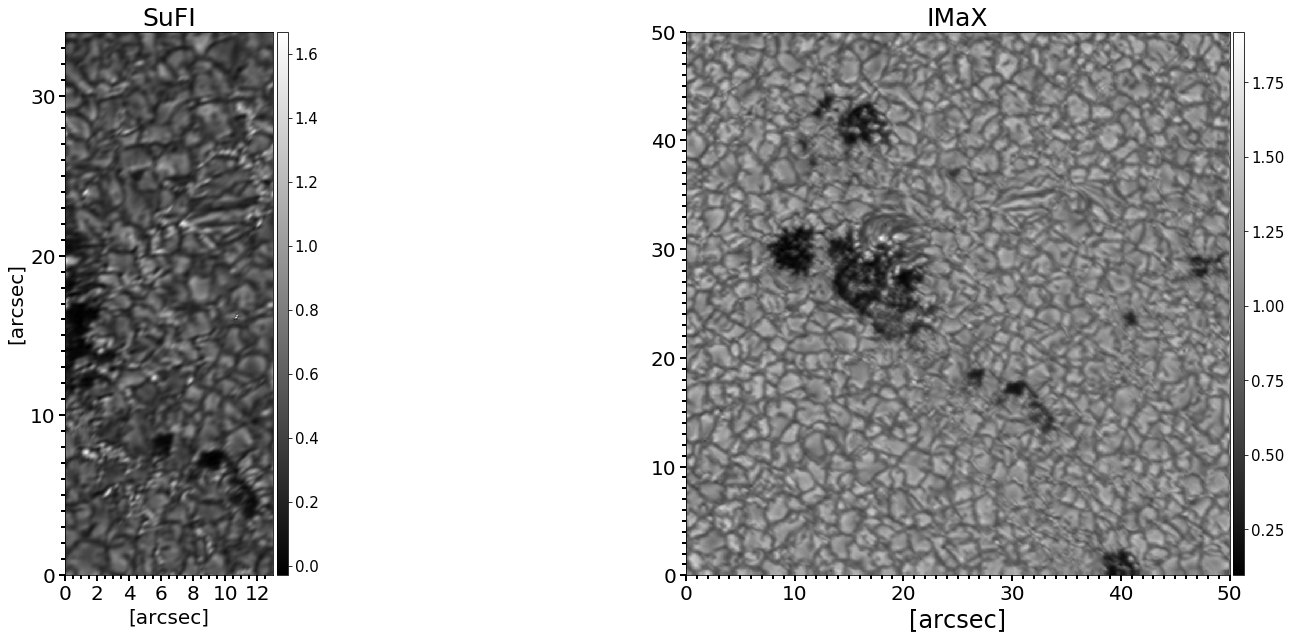

(1913, 776)
(936, 936)


In [3]:
fig=plt.figure(figsize=(25,10),facecolor='white')
aspect = 5
pad_fraction = 0.5

ax=fig.add_subplot(1,2,1)
im=ax.imshow(sufi_image, extent=[0,13,0,34],cmap=pylab.gray())
ax.set_xticks(np.arange(0,13,2))
ax.set_xticks(np.arange(0,13,0.5),minor=True)
ax.set_yticks(np.arange(0,34,10))
ax.set_yticks(np.arange(0,34,1),minor=True)
ax.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', length=4, width=2)
ax.set_xlabel('[arcsec]',fontsize=20)
ax.set_ylabel('[arcsec]',fontsize=20)
ax.set_title('SuFI',fontsize=25)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.15, pad=0.05)
cbar = plt.colorbar(im, cax=cax,orientation='vertical')#,ticks=np.arange(0.4,0.9,0.1))
cax.tick_params(labelsize=15)


ax2 = fig.add_subplot(1,2,2)
im2=ax2.imshow(imax_image, extent=[0,50,0,50],cmap=pylab.gray())
ax2.set_title('IMaX')
ax2.set_xticks(np.arange(0,51,10))
ax2.set_yticks(np.arange(0,51,10))
ax2.set_xticks(np.arange(0,51,1),minor=True)
ax2.set_yticks(np.arange(0,51,1),minor=True)
ax2.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 20)
ax2.tick_params(axis = 'both', which = 'minor', length=4, width=2)
ax2.set_title('IMaX',fontsize=25)
ax2.set_xlabel('[arcsec]',fontsize=24)
#ax.set_ylabel('[arcsec]',fontsize=20)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size=0.15, pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2,orientation='vertical')#,ticks=np.arange(0.4,0.9,0.1))
cax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.3, hspace=None)

plt.show()

## print the dimensions of the images
print sufi_image.shape
print imax_image.shape

### These are the images that need to be aligned. As a first step, SuFI image with a pixel size of 0.02 arcsec/pixel should be resampled to match the pixel size of IMaX of 0.05 arcsec/pixel, and therefore SuFI image will shrink. 
### For pixel size resampling, I will use the code __[Resampling](https://github.com/fakahil/PhD-codes-and-functions/blob/master/resampling.ipynb)__ where we used bi-linear interpolation to change the pixel size.


In [4]:
from scipy import interpolate

def Resample(data1,pixel_size_1,pixel_size_2):

 len_X = len(data1[1,:])
 len_Y = len(data1[:,1])
 p = pixel_size_2/pixel_size_1
 xnew = np.arange(0, len_X, p)
 ynew = np.arange(0,len_Y,p)
 f= interpolate.interp2d(np.arange(len_X), np.arange(len_Y),data1, kind='linear')
 resamp_data1 = f(xnew,ynew)
 return resamp_data1, resamp_data1.shape

In [5]:
sufi_resamp, sufi_resamp_shape = Resample(sufi_image, 0.02, 0.05)
print sufi_resamp_shape ## size of the resampled SuFI image

(766, 311)


### As a second step I will be manually trimming IMaX image to match the size and features of SuFI.

In [21]:
imax_trim = imax_image[120:886,370:681]

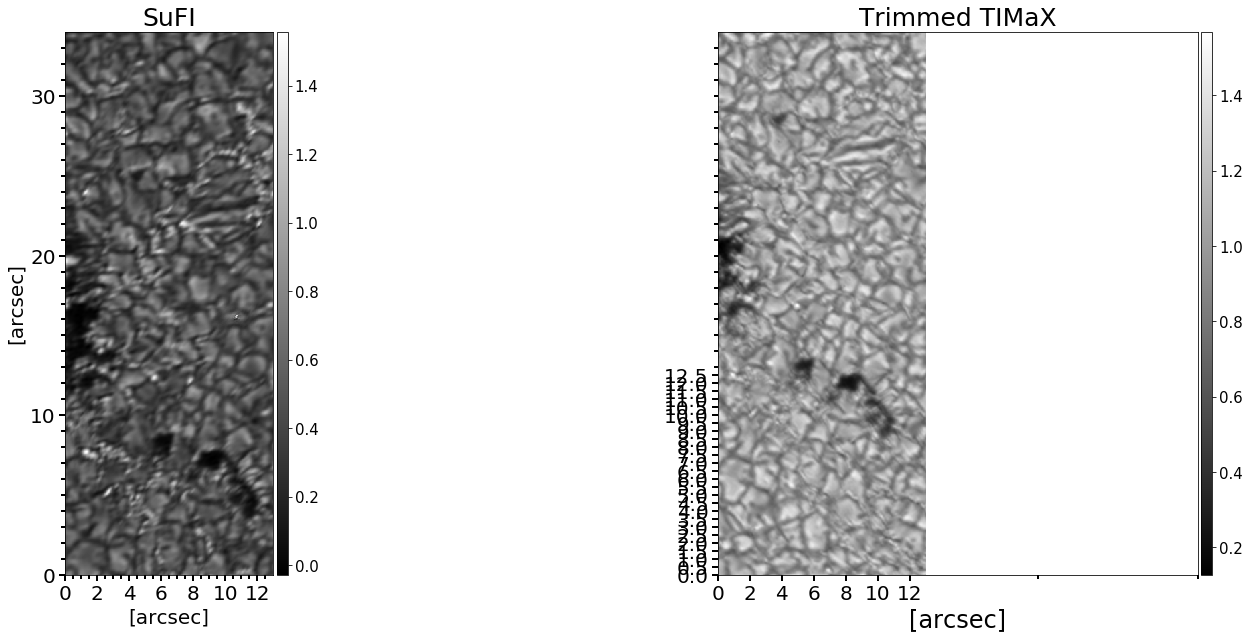

In [24]:
fig=plt.figure(figsize=(25,10),facecolor='white')
aspect = 5
pad_fraction = 0.5

ax=fig.add_subplot(1,2,1)
im=ax.imshow(sufi_resamp, extent=[0,13,0,34],cmap=pylab.gray())
ax.set_xticks(np.arange(0,13,2))
ax.set_xticks(np.arange(0,13,0.5),minor=True)
ax.set_yticks(np.arange(0,34,10))
ax.set_yticks(np.arange(0,34,1),minor=True)
ax.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 20)
ax.tick_params(axis = 'both', which = 'minor', length=4, width=2)
ax.set_xlabel('[arcsec]',fontsize=20)
ax.set_ylabel('[arcsec]',fontsize=20)
ax.set_title('SuFI',fontsize=25)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.15, pad=0.05)
cbar = plt.colorbar(im, cax=cax,orientation='vertical')#,ticks=np.arange(0.4,0.9,0.1))
cax.tick_params(labelsize=15)


ax2 = fig.add_subplot(1,2,2)
im2=ax2.imshow(imax_trim, extent=[0,13,0,34],cmap=pylab.gray())
ax2.set_xticks(np.arange(0,13,2))
ax2.set_yticks(np.arange(0,13,0.5))
ax2.set_xticks(np.arange(0,34,10),minor=True)
ax2.set_yticks(np.arange(0,34,1),minor=True)
ax2.tick_params(axis = 'both', which = 'major',length=6, width=2,labelsize = 20)
ax2.tick_params(axis = 'both', which = 'minor', length=4, width=2)
ax2.set_title('Trimmed TIMaX',fontsize=25)
ax2.set_xlabel('[arcsec]',fontsize=24)
#ax.set_ylabel('[arcsec]',fontsize=20)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size=0.15, pad=0.05)
cbar2 = plt.colorbar(im2, cax=cax2,orientation='vertical')#,ticks=np.arange(0.4,0.9,0.1))
cax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.3, hspace=None)

plt.show()


### Now that the two images have the same dimensions, we carry on with the image alignment . We will try to align the trimmed IMaX to the resampled SufI image. For this we will be using the package __[imreg_dft](https://imreg-dft.readthedocs.io/en/latest/)__

In [8]:
import imreg_dft

### This module is not installed, we install it by typing:

In [55]:
! pip install --user imreg_dft

You are using pip version 18.0, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [65]:
! pip install --user --upgrade pip


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Requirement already up-to-date: pip in /home/fatima/.local/lib/python2.7/site-packages (19.1.1)


In [66]:
! pip install --user imreg_dft

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [9]:
import imreg_dft

In [10]:
result = imreg_dft.translation(imax_trim,sufi_resamp) 

In [11]:
print ('The offset of the trimmed IMaX image is {}'.format(tuple(result['tvec'])))
del_y = result['tvec'][0]
del_x = result['tvec'][0]

The offset of the trimmed IMaX image is (-1.0168473658063135, 0.19232864396599325)


### We consider those offsets back when we trim the IMaX image to match SuFI image:

In [14]:
imax_trim_2 = imax_image[120-int(round(del_y)):886-int(round(del_y)),370-int(round(del_x)):681-int(round(del_x))]


### check if the new trimming yields to more accurate matching:

In [19]:
result_2 = imreg_dft.translation(sufi_resamp,imax_trim_2) 
print result_2['tvec']
del_y = result['tvec'][0]
del_x = result['tvec'][0]

[ 0.22133405 -0.02294892]


### Now that the shifts in x and y are only fractions of a pixel, we can use the computed shifts to trim the IMaX image again matching the SuFI image:


In [20]:
imax_trim_final = imax_image[120-int(round(del_y)):886-int(round(del_y)),370+int(round(del_x)):681+int(round(del_x))]
